In [62]:
import numpy as np
import sys
import time
import pickle
import pandas as pd
from sklearn import svm
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import sklearn.metrics as metrics

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report,roc_curve,auc, f1_score, plot_roc_curve
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,roc_auc_score,classification_report,roc_curve,auc, f1_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import plotly.graph_objects as go

from imblearn.under_sampling import RandomUnderSampler
from sklearn.svm import SVC

import src.modules.processor as Processor
import src.modules.model as Model

from sklearn.ensemble import BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

from tqdm import tqdm
from IPython.display import display

In [4]:
df = pd.read_csv("../../data/final-data/final-without-HLA.csv")
train = pd.read_csv("../../data/split-data/without-mhc/train/train.csv")

In [35]:
tmp = df["epitope"].value_counts()
tmp2 = tmp.to_frame(name="count")
values = ["GLCTLVAML", "NLVPMVATV", "GILGFVFTL", "TPRVTGGGAM", "ELAGIGILTV", "AVFDRKSDAK", "KLGGALQAK"]

values_GLCTLVAML=["GLCTLVAML"]
values_NLVPMVATV=["NLVPMVATV"]
values_GILGFVFTL=["GILGFVFTL"]
values_TPRVTGGGAM=["TPRVTGGGAM"]
values_ELAGIGILTV=["ELAGIGILTV"]
values_AVFDRKSDAK=["AVFDRKSDAK"]
values_KLGGALQAK=["KLGGALQAK"]

In [36]:
data_GLCTLVAML = df[df["epitope"].isin(values_GLCTLVAML)]
data_GLCTLVAML = data_GLCTLVAML.reset_index(drop=True)

data_NLVPMVATV = df[df["epitope"].isin(values_NLVPMVATV)]
data_NLVPMVATV = data_NLVPMVATV.reset_index(drop=True)

data_GILGFVFTL = df[df["epitope"].isin(values_GILGFVFTL)]
data_GILGFVFTL = data_GILGFVFTL.reset_index(drop=True)

data_TPRVTGGGAM = df[df["epitope"].isin(values_TPRVTGGGAM)]
data_TPRVTGGGAM = data_TPRVTGGGAM.reset_index(drop=True)

data_ELAGIGILTV = df[df["epitope"].isin(values_ELAGIGILTV)]
data_ELAGIGILTV = data_ELAGIGILTV.reset_index(drop=True)

data_AVFDRKSDAK = df[df["epitope"].isin(values_AVFDRKSDAK)]
data_AVFDRKSDAK = data_AVFDRKSDAK.reset_index(drop=True)

data_KLGGALQAK = df[df["epitope"].isin(values_KLGGALQAK)]
data_KLGGALQAK = data_KLGGALQAK.reset_index(drop=True)

data_final = train[train["epitope"].isin(values)]
data_final = data_final.reset_index(drop=True)

In [37]:
X_GLCTLVAML   = data_GLCTLVAML.iloc[:, lambda data_GLCTLVAML: [0, 1]]
X_NLVPMVATV   = data_NLVPMVATV.iloc[:, lambda data_NLVPMVATV: [0, 1]]
X_GILGFVFTL   = data_GILGFVFTL.iloc[:, lambda data_GILGFVFTL: [0, 1]]
X_TPRVTGGGAM  = data_TPRVTGGGAM.iloc[:, lambda data_TPRVTGGGAM: [0, 1]]
X_ELAGIGILTV  = data_ELAGIGILTV.iloc[:, lambda data_ELAGIGILTV: [0, 1]]
X_AVFDRKSDAK   = data_AVFDRKSDAK.iloc[:, lambda data_AVFDRKSDAK: [0, 1]]
X_KLGGALQAK = data_KLGGALQAK.iloc[:, lambda data_KLGGALQAK: [0, 1]]

y_GLCTLVAML   = data_GLCTLVAML.iloc[:, lambda data_GLCTLVAML: [2]]
y_NLVPMVATV   = data_NLVPMVATV.iloc[:, lambda data_NLVPMVATV: [2]]
y_GILGFVFTL   = data_GILGFVFTL.iloc[:, lambda data_GILGFVFTL: [2]]
y_TPRVTGGGAM  = data_TPRVTGGGAM.iloc[:, lambda data_TPRVTGGGAM: [2]]
y_ELAGIGILTV  = data_ELAGIGILTV.iloc[:, lambda data_ELAGIGILTV: [2]]
y_AVFDRKSDAK   = data_AVFDRKSDAK.iloc[:, lambda data_AVFDRKSDAK: [2]]
y_KLGGALQAK = data_KLGGALQAK.iloc[:, lambda data_KLGGALQAK: [2]]

X_final = data_final.iloc[:, lambda data_final: [0, 1]]
y_final = data_final.iloc[:, lambda data_final: [2]]

In [38]:
X_train_GLCTLVAML  , X_test_GLCTLVAML  , y_train_GLCTLVAML  , y_test_GLCTLVAML   = train_test_split(X_GLCTLVAML  , y_GLCTLVAML  , test_size=0.2, random_state=42)
X_train_NLVPMVATV  , X_test_NLVPMVATV  , y_train_NLVPMVATV  , y_test_NLVPMVATV   = train_test_split(X_NLVPMVATV  , y_NLVPMVATV  , test_size=0.2, random_state=42)
X_train_GILGFVFTL  , X_test_GILGFVFTL  , y_train_GILGFVFTL  , y_test_GILGFVFTL   = train_test_split(X_GILGFVFTL  , y_GILGFVFTL  , test_size=0.2, random_state=42)
X_train_TPRVTGGGAM , X_test_TPRVTGGGAM , y_train_TPRVTGGGAM , y_test_TPRVTGGGAM  = train_test_split(X_TPRVTGGGAM , y_TPRVTGGGAM , test_size=0.2, random_state=42)
X_train_ELAGIGILTV , X_test_ELAGIGILTV , y_train_ELAGIGILTV , y_test_ELAGIGILTV  = train_test_split(X_ELAGIGILTV , y_ELAGIGILTV , test_size=0.2, random_state=42)
X_train_AVFDRKSDAK  , X_test_AVFDRKSDAK  , y_train_AVFDRKSDAK  , y_test_AVFDRKSDAK   = train_test_split(X_AVFDRKSDAK  , y_AVFDRKSDAK  , test_size=0.2, random_state=42)
X_train_KLGGALQAK, X_test_KLGGALQAK, y_train_KLGGALQAK, y_test_KLGGALQAK = train_test_split(X_KLGGALQAK, y_KLGGALQAK, test_size=0.2, random_state=42)
X_train_final  , X_test_final , y_train_final  , y_test_final   = train_test_split(X_final, y_final  , test_size=0.2, random_state=42)

In [39]:
print(X_train_GLCTLVAML.shape  , y_train_GLCTLVAML.shape)
print(X_train_NLVPMVATV.shape  , y_train_NLVPMVATV.shape)
print(X_train_GILGFVFTL.shape  , y_train_GILGFVFTL.shape)
print(X_train_TPRVTGGGAM.shape , y_train_TPRVTGGGAM.shape)
print(X_train_ELAGIGILTV.shape , y_train_ELAGIGILTV.shape) 
print(X_train_AVFDRKSDAK.shape, y_train_AVFDRKSDAK.shape)
print(X_train_KLGGALQAK .shape, y_train_KLGGALQAK.shape)
print(X_train_final.shape  , y_train_final.shape)

X_train_GLCTLVAML  , y_train_GLCTLVAML   = X_train_GLCTLVAML.reset_index(drop=True), y_train_GLCTLVAML.reset_index(drop=True)
X_train_NLVPMVATV  , y_train_NLVPMVATV   = X_train_NLVPMVATV.reset_index(drop=True), y_train_NLVPMVATV.reset_index(drop=True)
X_train_GILGFVFTL  , y_train_GILGFVFTL   = X_train_GILGFVFTL.reset_index(drop=True), y_train_GILGFVFTL.reset_index(drop=True)
X_train_TPRVTGGGAM , y_train_TPRVTGGGAM  = X_train_TPRVTGGGAM.reset_index(drop=True), y_train_TPRVTGGGAM.reset_index(drop=True)
X_train_ELAGIGILTV , y_train_ELAGIGILTV  = X_train_ELAGIGILTV.reset_index(drop=True), y_train_ELAGIGILTV.reset_index(drop=True)
X_train_AVFDRKSDAK, y_train_AVFDRKSDAK = X_train_AVFDRKSDAK.reset_index(drop=True), y_train_AVFDRKSDAK.reset_index(drop=True)
X_train_KLGGALQAK , y_train_KLGGALQAK  = X_train_KLGGALQAK .reset_index(drop=True), y_train_KLGGALQAK .reset_index(drop=True)
X_train_final, y_train_final = X_train_final.reset_index(drop=True), y_train_final.reset_index(drop=True)

(55861, 2) (55861, 1)
(54567, 2) (54567, 1)
(54004, 2) (54004, 1)
(52578, 2) (52578, 1)
(51914, 2) (51914, 1)
(50525, 2) (50525, 1)
(50592, 2) (50592, 1)
(35867, 2) (35867, 1)


In [40]:
y_train_GLCTLVAML = y_train_GLCTLVAML.iloc[:, 0]
y_train_NLVPMVATV = y_train_NLVPMVATV.iloc[:, 0]
y_train_GILGFVFTL = y_train_GILGFVFTL.iloc[:, 0]
y_train_TPRVTGGGAM = y_train_TPRVTGGGAM.iloc[:, 0]
y_train_ELAGIGILTV = y_train_ELAGIGILTV.iloc[:, 0]
y_train_AVFDRKSDAK = y_train_AVFDRKSDAK.iloc[:, 0]
y_train_KLGGALQAK  = y_train_KLGGALQAK .iloc[:, 0]
y_train_final = y_train_final.iloc[:, 0]

In [42]:
nm = RandomUnderSampler(random_state=42)
X_res_GLCTLVAML  , y_res_GLCTLVAML   = nm.fit_resample(X_train_GLCTLVAML  , y_train_GLCTLVAML  )
X_res_NLVPMVATV  , y_res_NLVPMVATV   = nm.fit_resample(X_train_NLVPMVATV  , y_train_NLVPMVATV  )
X_res_GILGFVFTL  , y_res_GILGFVFTL   = nm.fit_resample(X_train_GILGFVFTL  , y_train_GILGFVFTL  )
X_res_TPRVTGGGAM , y_res_TPRVTGGGAM  = nm.fit_resample(X_train_TPRVTGGGAM , y_train_TPRVTGGGAM )
X_res_ELAGIGILTV , y_res_ELAGIGILTV  = nm.fit_resample(X_train_ELAGIGILTV , y_train_ELAGIGILTV )
X_res_AVFDRKSDAK, y_res_AVFDRKSDAK = nm.fit_resample(X_train_AVFDRKSDAK, y_train_AVFDRKSDAK)
X_res_KLGGALQAK , y_res_KLGGALQAK  = nm.fit_resample(X_train_KLGGALQAK , y_train_KLGGALQAK )
X_res_final  , y_res_final   = nm.fit_resample(X_train_final , y_train_final)

print(X_res_GLCTLVAML  .shape, y_res_GLCTLVAML  .shape)
print(X_res_NLVPMVATV  .shape, y_res_NLVPMVATV  .shape)
print(X_res_GILGFVFTL  .shape, y_res_GILGFVFTL  .shape)
print(X_res_TPRVTGGGAM .shape, y_res_TPRVTGGGAM .shape)
print(X_res_ELAGIGILTV .shape, y_res_ELAGIGILTV .shape)
print(X_res_AVFDRKSDAK.shape, y_res_AVFDRKSDAK.shape)
print(X_res_KLGGALQAK .shape, y_res_KLGGALQAK .shape)
print(X_res_final  .shape, y_res_final  .shape)

(10706, 2) (10706,)
(8114, 2) (8114,)
(7886, 2) (7886,)
(4014, 2) (4014,)
(3068, 2) (3068,)
(2554, 2) (2554,)
(21814, 2) (21814,)
(3592, 2) (3592,)


In [43]:
res_GLCTLVAML   = pd.concat([X_res_GLCTLVAML  , y_res_GLCTLVAML  ], axis=1)
res_NLVPMVATV   = pd.concat([X_res_NLVPMVATV  , y_res_NLVPMVATV  ], axis=1)
res_GILGFVFTL   = pd.concat([X_res_GILGFVFTL  , y_res_GILGFVFTL  ], axis=1)
res_TPRVTGGGAM  = pd.concat([X_res_TPRVTGGGAM , y_res_TPRVTGGGAM ], axis=1)
res_ELAGIGILTV  = pd.concat([X_res_ELAGIGILTV , y_res_ELAGIGILTV ], axis=1)
res_AVFDRKSDAK = pd.concat([X_res_AVFDRKSDAK, y_res_AVFDRKSDAK], axis=1)
res_KLGGALQAK  = pd.concat([X_res_KLGGALQAK , y_res_KLGGALQAK ], axis=1)
res_final   = pd.concat([X_res_final  , y_res_final  ], axis=1)

In [ ]:
pX_res_GLCTLVAML   = Processor.data_representation(X_res_GLCTLVAML)
pX_res_NLVPMVATV   = Processor.data_representation(X_res_NLVPMVATV)
pX_res_GILGFVFTL   = Processor.data_representation(X_res_GILGFVFTL)
pX_res_TPRVTGGGAM  = Processor.data_representation(X_res_TPRVTGGGAM)
pX_res_ELAGIGILTV  = Processor.data_representation(X_res_ELAGIGILTV)
pX_res_AVFDRKSDAK = Processor.data_representation(X_res_AVFDRKSDAK)
pX_res_KLGGALQAK  = Processor.data_representation(X_res_KLGGALQAK )
pX_res_final = Processor.data_representation(X_res_final)

py_res_GLCTLVAML   = y_res_GLCTLVAML  .copy()
py_res_NLVPMVATV   = y_res_NLVPMVATV  .copy()
py_res_GILGFVFTL   = y_res_GILGFVFTL  .copy()
py_res_TPRVTGGGAM  = y_res_TPRVTGGGAM .copy()
py_res_ELAGIGILTV  = y_res_ELAGIGILTV .copy()
py_res_AVFDRKSDAK = y_res_AVFDRKSDAK.copy()
py_res_KLGGALQAK  = y_res_KLGGALQAK .copy()
py_res_final = y_res_final.copy()

In [ ]:
pX_test_GLCTLVAML   = Processor.data_representation(X_test_GLCTLVAML)
pX_test_NLVPMVATV   = Processor.data_representation(X_test_NLVPMVATV)
pX_test_GILGFVFTL   = Processor.data_representation(X_test_GILGFVFTL)
pX_test_TPRVTGGGAM  = Processor.data_representation(X_test_TPRVTGGGAM)
pX_test_ELAGIGILTV  = Processor.data_representation(X_test_ELAGIGILTV)
pX_test_AVFDRKSDAK = Processor.data_representation(X_test_AVFDRKSDAK)
pX_test_KLGGALQAK  = Processor.data_representation(X_test_KLGGALQAK )
pX_test_final   = Processor.data_representation(X_test_final)

py_test_GLCTLVAML   = y_test_GLCTLVAML  .copy()
py_test_NLVPMVATV   = y_test_NLVPMVATV  .copy()
py_test_GILGFVFTL   = y_test_GILGFVFTL  .copy()
py_test_TPRVTGGGAM  = y_test_TPRVTGGGAM .copy()
py_test_ELAGIGILTV  = y_test_ELAGIGILTV .copy()
py_test_AVFDRKSDAK= y_test_AVFDRKSDAK.copy()
py_test_KLGGALQAK = y_test_KLGGALQAK .copy()
py_test_final   = y_test_final.copy()

In [ ]:
pX_res_GLCTLVAML.to_csv("../../data/convert-data/7-peptides/X_res_GLCTLVAML.csv" , index=False)
pX_res_NLVPMVATV.to_csv("../../data/convert-data/7-peptides/X_res_NLVPMVATV.csv" , index=False)
pX_res_GILGFVFTL.to_csv("../../data/convert-data/7-peptides/X_res_GILGFVFTL.csv" , index=False)
pX_res_TPRVTGGGAM.to_csv("../../data/convert-data/7-peptides/X_res_TPRVTGGGAM.csv", index=False)
pX_res_ELAGIGILTV.to_csv("../../data/convert-data/7-peptides/X_res_ELAGIGILTV.csv", index=False)
pX_res_AVFDRKSDAK.to_csv("../../data/convert-data/7-peptides/X_res_AVFDRKSDAK.csv", index=False)
pX_res_KLGGALQAK.to_csv("../../data/data_representation/pX_res_KLGGALQAK.csv", index=False)
pX_res_final.to_csv("../../data/data_representation/pX_res_final.csv", index=False)

py_res_GLCTLVAML.to_csv("../../data/convert-data/7-peptides/y_res_GLCTLVAML.csv" , index=False)
py_res_NLVPMVATV.to_csv("../../data/convert-data/7-peptides/y_res_NLVPMVATV.csv" , index=False)
py_res_GILGFVFTL.to_csv("../../data/convert-data/7-peptides/y_res_GILGFVFTL.csv" , index=False)
py_res_TPRVTGGGAM.to_csv("../../data/convert-data/7-peptides/y_res_TPRVTGGGAM.csv", index=False)
py_res_ELAGIGILTV.to_csv("../../data/convert-data/7-peptides/y_res_ELAGIGILTV.csv", index=False)
py_res_AVFDRKSDAK.to_csv("../../data/convert-data/7-peptides/y_res_AVFDRKSDAK.csv", index=False)
py_res_KLGGALQAK.to_csv("../../data/convert-data/7-peptides/y_res_KLGGALQAK.csv", index=False)
py_res_final.to_csv("../../data/data_representation/py_res_final.csv", index=False)


In [ ]:
pX_test_GLCTLVAML.to_csv("../../data/convert-data/7-peptides/X_test_GLCTLVAML.csv" , index=False)
pX_test_NLVPMVATV.to_csv("../../data/convert-data/7-peptides/X_test_NLVPMVATV.csv" , index=False)
pX_test_GILGFVFTL.to_csv("../../data/convert-data/7-peptides/X_test_GILGFVFTL.csv" , index=False)
pX_test_TPRVTGGGAM.to_csv("../../data/convert-data/7-peptides/X_test_TPRVTGGGAM.csv", index=False)
pX_test_ELAGIGILTV.to_csv("../../data/convert-data/7-peptides/X_test_ELAGIGILTV.csv", index=False)
pX_test_AVFDRKSDAK.to_csv("../../data/convert-data/7-peptides/X_test_AVFDRKSDAK.csv", index=False)
pX_test_KLGGALQAK.to_csv("../../data/data_representation/X_test_KLGGALQAK.csv", index=False)
pX_test_final.to_csv("../../data/data_representation/X_test_final.csv", index=False)

py_test_GLCTLVAML.to_csv("../../data/convert-data/7-peptides/y_test_GLCTLVAML.csv" , index=False)
py_test_NLVPMVATV.to_csv("../../data/convert-data/7-peptides/y_test_NLVPMVATV.csv" , index=False)
py_test_GILGFVFTL.to_csv("../../data/convert-data/7-peptides/y_test_GILGFVFTL.csv" , index=False)
py_test_TPRVTGGGAM.to_csv("../../data/convert-data/7-peptides/y_test_TPRVTGGGAM.csv", index=False)
py_test_ELAGIGILTV.to_csv("../../data/convert-data/7-peptides/y_test_ELAGIGILTV.csv", index=False)
py_test_AVFDRKSDAK.to_csv("../../data/convert-data/7-peptides/y_test_AVFDRKSDAK.csv", index=False)
py_test_KLGGALQAK.to_csv("../../data/convert-data/7-peptides/y_test_KLGGALQAK.csv", index=False)
py_test_final.to_csv("../../data/data_representation/py_test_final.csv", index=False)

In [50]:
pX_res_GLCTLVAML  = pd.read_csv("../../data/convert-data/7-peptides/X_res_GLCTLVAML.csv")
pX_res_NLVPMVATV  = pd.read_csv("../../data/convert-data/7-peptides/X_res_NLVPMVATV.csv")
pX_res_GILGFVFTL  = pd.read_csv("../../data/convert-data/7-peptides/X_res_GILGFVFTL.csv")
pX_res_TPRVTGGGAM = pd.read_csv("../../data/convert-data/7-peptides/X_res_TPRVTGGGAM.csv")
pX_res_ELAGIGILTV = pd.read_csv("../../data/convert-data/7-peptides/X_res_ELAGIGILTV.csv")
pX_res_AVFDRKSDAK = pd.read_csv("../../data/convert-data/7-peptides/X_res_AVFDRKSDAK.csv")
pX_res_KLGGALQAK  = pd.read_csv("../../data/convert-data/7-peptides/X_res_KLGGALQAK.csv")
pX_res_final = pd.read_csv("../../data/convert-data/7-peptides/X_res_final.csv")

py_res_GLCTLVAML  = pd.read_csv("../../data/convert-data/7-peptides/y_res_GLCTLVAML.csv")
py_res_NLVPMVATV  = pd.read_csv("../../data/convert-data/7-peptides/y_res_NLVPMVATV.csv")
py_res_GILGFVFTL  = pd.read_csv("../../data/convert-data/7-peptides/y_res_GILGFVFTL.csv")
py_res_TPRVTGGGAM = pd.read_csv("../../data/convert-data/7-peptides/y_res_TPRVTGGGAM.csv")
py_res_ELAGIGILTV = pd.read_csv("../../data/convert-data/7-peptides/y_res_ELAGIGILTV.csv")
py_res_AVFDRKSDAK = pd.read_csv("../../data/convert-data/7-peptides/y_res_AVFDRKSDAK.csv")
py_res_KLGGALQAK  = pd.read_csv("../../data/convert-data/7-peptides/y_res_KLGGALQAK.csv")
py_res_final = pd.read_csv("../../data/convert-data/7-peptides/y_res_final.csv")


In [54]:
pX_test_GLCTLVAML = pd.read_csv("../../data/convert-data/7-peptides/X_test_GLCTLVAML.csv" )
pX_test_NLVPMVATV = pd.read_csv("../../data/convert-data/7-peptides/X_test_NLVPMVATV.csv" )
pX_test_GILGFVFTL = pd.read_csv("../../data/convert-data/7-peptides/X_test_GILGFVFTL.csv" )
pX_test_TPRVTGGGAM = pd.read_csv("../../data/convert-data/7-peptides/X_test_TPRVTGGGAM.csv")
pX_test_ELAGIGILTV = pd.read_csv("../../data/convert-data/7-peptides/X_test_ELAGIGILTV.csv")
pX_test_AVFDRKSDAK = pd.read_csv("../../data/convert-data/7-peptides/X_test_AVFDRKSDAK.csv")
pX_test_KLGGALQAK = pd.read_csv("../../data/convert-data/7-peptides/X_test_KLGGALQAK.csv")
pX_test_final = pd.read_csv("../../data/convert-data/7-peptides/X_test_final.csv")

py_test_GLCTLVAML = pd.read_csv("../../data/convert-data/7-peptides/y_test_GLCTLVAML.csv")
py_test_NLVPMVATV = pd.read_csv("../../data/convert-data/7-peptides/y_test_NLVPMVATV.csv")
py_test_GILGFVFTL = pd.read_csv("../../data/convert-data/7-peptides/y_test_GILGFVFTL.csv" )
py_test_TPRVTGGGAM = pd.read_csv("../../data/convert-data/7-peptides/y_test_TPRVTGGGAM.csv")
py_test_ELAGIGILTV = pd.read_csv("../../data/convert-data/7-peptides/y_test_ELAGIGILTV.csv")
py_test_AVFDRKSDAK = pd.read_csv("../../data/convert-data/7-peptides/y_test_AVFDRKSDAK.csv")
py_test_KLGGALQAK = pd.read_csv("../../data/convert-data/7-peptides/y_test_KLGGALQAK.csv")
py_test_final = pd.read_csv("../../data/convert-data/7-peptides/y_test_final.csv")

In [32]:
lst_models = [
    ('Random Forest', RandomForestClassifier(random_state=42, n_jobs=-1)),
]

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [57]:
original_models_GLCTLVAML   = Model.train(lst_models, pX_res_GLCTLVAML  , np.ravel(py_res_GLCTLVAML  ), cv)
original_models_NLVPMVATV   = Model.train(lst_models, pX_res_NLVPMVATV  , np.ravel(py_res_NLVPMVATV  ), cv)
original_models_GILGFVFTL   = Model.train(lst_models, pX_res_GILGFVFTL  , np.ravel(py_res_GILGFVFTL  ), cv)
original_models_TPRVTGGGAM  = Model.train(lst_models, pX_res_TPRVTGGGAM , np.ravel(py_res_TPRVTGGGAM ), cv)
original_models_ELAGIGILTV  = Model.train(lst_models, pX_res_ELAGIGILTV , np.ravel(py_res_ELAGIGILTV ), cv)
original_models_AVFDRKSDAK = Model.train(lst_models, pX_res_AVFDRKSDAK, np.ravel(py_res_AVFDRKSDAK), cv)
original_models_KLGGALQAK  = Model.train(lst_models, pX_res_KLGGALQAK , np.ravel(py_res_KLGGALQAK ), cv)
original_models_final   = Model.train(lst_models, pX_res_final  , np.ravel(py_res_final ), cv)

	Model Random Forest has been trained in 6.74 seconds
	Model Random Forest has been trained in 5.87 seconds
	Model Random Forest has been trained in 5.68 seconds
	Model Random Forest has been trained in 4.73 seconds
	Model Random Forest has been trained in 4.28 seconds
	Model Random Forest has been trained in 4.12 seconds
	Model Random Forest has been trained in 12.57 seconds
	Model Random Forest has been trained in 35.73 seconds


In [56]:
lst_tunning_models = [
    ('Random Forest', RandomForestClassifier(random_state=42, n_jobs=-1), {
        'bootstrap': [True, False],
        'max_depth': [60, 70, 80, 90, 100, None],
        'max_features': ["auto", "log2", 5, 10, 15],
        'min_samples_leaf': [1, 2, 4],
        'n_estimators': [200, 400, 600, 800]}),]


lst_tunning_models_GLCTLVAML  = Model.trainTunningModel(lst_tunning_models, pX_res_GLCTLVAML  , np.ravel(py_res_GLCTLVAML  ), cv)
lst_tunning_models_NLVPMVATV   = Model.trainTunningModel(lst_tunning_models, pX_res_NLVPMVATV  , np.ravel(py_res_NLVPMVATV  ), cv)
lst_tunning_models_GILGFVFTL   = Model.trainTunningModel(lst_tunning_models, pX_res_GILGFVFTL  , np.ravel(py_res_GILGFVFTL  ), cv)
lst_tunning_models_TPRVTGGGAM  = Model.trainTunningModel(lst_tunning_models, pX_res_TPRVTGGGAM , np.ravel(py_res_TPRVTGGGAM ), cv)
lst_tunning_models_ELAGIGILTV  = Model.trainTunningModel(lst_tunning_models, pX_res_ELAGIGILTV , np.ravel(py_res_ELAGIGILTV ), cv)
lst_tunning_models_AVFDRKSDAK = Model.trainTunningModel(lst_tunning_models, pX_res_AVFDRKSDAK, np.ravel(py_res_AVFDRKSDAK), cv)
lst_tunning_models_KLGGALQAK = Model.trainTunningModel(lst_tunning_models, pX_res_KLGGALQAK, np.ravel(py_res_KLGGALQAK), cv)

	Model Random Forest has been trained in 16.60 seconds


In [65]:
lst_tunning_models_final =  [('Random Forest', 
RandomForestClassifier(bootstrap=False, 
                         max_depth=60, max_features='auto',
                         max_leaf_nodes=None, max_samples=None,
                         min_impurity_decrease=0.0,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, n_estimators=400,
                         n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                         warm_start=False))]
lst_tunning_models_GLCTLVAML  = [('Random Forest',
  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                         criterion='gini', max_depth=70, max_features=5,
                         max_leaf_nodes=None, max_samples=None,
                         min_impurity_decrease=0.0, 
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, n_estimators=600,
                         n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                         warm_start=False))]
lst_tunning_models_NLVPMVATV  = [('Random Forest',
  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                         criterion='gini', max_depth=60, max_features=10,
                         max_leaf_nodes=None, max_samples=None,
                         min_impurity_decrease=0.0, 
                         min_samples_leaf=2, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, n_estimators=200,
                         n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                         warm_start=False))]
lst_tunning_models_GILGFVFTL  = [('Random Forest',
  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                         criterion='gini', max_depth=60, max_features=10,
                         max_leaf_nodes=None, max_samples=None,
                         min_impurity_decrease=0.0, 
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, n_estimators=600,
                         n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                         warm_start=False))]
lst_tunning_models_TPRVTGGGAM = [('Random Forest',
  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                         criterion='gini', max_depth=80, max_features='auto',
                         max_leaf_nodes=None, max_samples=None,
                         min_impurity_decrease=0.0, 
                         min_samples_leaf=2, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, n_estimators=200,
                         n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                         warm_start=False))]
lst_tunning_models_ELAGIGILTV = [('Random Forest',
  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                         criterion='gini', max_depth=80, max_features='log2',
                         max_leaf_nodes=None, max_samples=None,
                         min_impurity_decrease=0.0, 
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, n_estimators=600,
                         n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                         warm_start=False))]
lst_tunning_models_AVFDRKSDAK = [('Random Forest',
  RandomForestClassifier(max_depth=70, max_features=5, min_samples_leaf=2,
                         n_estimators=600, n_jobs=-1, random_state=42))]
lst_tunning_models_KLGGALQAK = [('Random Forest',
  RandomForestClassifier(max_depth=60, max_features='auto', min_samples_leaf=2,
                         n_estimators=400, n_jobs=-1, random_state=42))]

In [ ]:
best_models = Model.evaluation(lst_tunning_models, pX_res_final , np.ravel(py_res_final), pX_test_final, py_test_final)
best_models_GLCTLVAML   = Model.evaluation(lst_tunning_models_GLCTLVAML  , pX_res_GLCTLVAML  , np.ravel(py_res_GLCTLVAML  ), pX_test_GLCTLVAML  , py_test_GLCTLVAML  )
best_models_NLVPMVATV   = Model.evaluation(lst_tunning_models_NLVPMVATV  , pX_res_NLVPMVATV  , np.ravel(py_res_NLVPMVATV  ), pX_test_NLVPMVATV  , py_test_NLVPMVATV  )
best_models_GILGFVFTL   = Model.evaluation(lst_tunning_models_GILGFVFTL  , pX_res_GILGFVFTL  , np.ravel(py_res_GILGFVFTL  ), pX_test_GILGFVFTL  , py_test_GILGFVFTL  )
best_models_TPRVTGGGAM  = Model.evaluation(lst_tunning_models_TPRVTGGGAM , pX_res_TPRVTGGGAM , np.ravel(py_res_TPRVTGGGAM ), pX_test_TPRVTGGGAM , py_test_TPRVTGGGAM )
best_models_ELAGIGILTV  = Model.evaluation(lst_tunning_models_ELAGIGILTV , pX_res_ELAGIGILTV , np.ravel(py_res_ELAGIGILTV ), pX_test_ELAGIGILTV , py_test_ELAGIGILTV )
best_models_AVFDRKSDAK = Model.evaluation(lst_tunning_models_AVFDRKSDAK, pX_res_AVFDRKSDAK, np.ravel(py_res_AVFDRKSDAK ), pX_test_AVFDRKSDAK  , py_test_AVFDRKSDAK)
best_models_KLGGALQAK  = Model.evaluation(lst_tunning_models_KLGGALQAK , pX_res_KLGGALQAK , np.ravel(py_res_KLGGALQAK), pX_test_KLGGALQAK, py_test_KLGGALQAK )

In [60]:
class epitcrModel:
    def __init__(self, pmodel, pX, py):
        self.model = pmodel
        self.model.fit(pX, py)
    
    def predict(self, pnew_data):
        yhat_class = self.model.predict(pnew_data)
        return yhat_class 

    
    def info(self):
        print(self.model)
    
    def rocAuc(self, X, y_true):
        ax = plt.subplot()
        n = X.shape[0]
        mean_fpr = np.linspace(0, 1, n)
        tprs = []
        aucs = []
        viz = plot_roc_curve(self.model, X, y_true,
                                name='Random Forest',
                                alpha=.3, lw=2, ax=ax)
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

        ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)
        ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
        title="ROC curve comparison")
        ax.legend(loc="lower right")
        plt.show()
    
    def predict_proba(self, pnew_data):
        yhat_class = self.model.predict_proba(pnew_data)
        return yhat_class 

In [67]:
rf_tcr_final = lst_tunning_models_final[0][1]
rf_tcr_GLCTLVAML   = lst_tunning_models_GLCTLVAML  [0][1]
rf_tcr_NLVPMVATV   = lst_tunning_models_NLVPMVATV  [0][1]
rf_tcr_GILGFVFTL   = lst_tunning_models_GILGFVFTL  [0][1]
rf_tcr_TPRVTGGGAM  = lst_tunning_models_TPRVTGGGAM [0][1]
rf_tcr_ELAGIGILTV  = lst_tunning_models_ELAGIGILTV [0][1]
rf_tcr_AVFDRKSDAK = lst_tunning_models_AVFDRKSDAK[0][1]
rf_tcr_KLGGALQAK  = lst_tunning_models_KLGGALQAK [0][1]

model_rf_final = epitcrModel(rf_tcr_final, pX_res_final , np.ravel(py_res_final  ))
model_rf_GLCTLVAML   = epitcrModel(rf_tcr_GLCTLVAML  , pX_res_GLCTLVAML  , np.ravel(py_res_GLCTLVAML  ))
model_rf_NLVPMVATV   = epitcrModel(rf_tcr_NLVPMVATV  , pX_res_NLVPMVATV  , np.ravel(py_res_NLVPMVATV  ))
model_rf_GILGFVFTL   = epitcrModel(rf_tcr_GILGFVFTL  , pX_res_GILGFVFTL  , np.ravel(py_res_GILGFVFTL  ))
model_rf_TPRVTGGGAM  = epitcrModel(rf_tcr_TPRVTGGGAM , pX_res_TPRVTGGGAM , np.ravel(py_res_TPRVTGGGAM ))
model_rf_ELAGIGILTV  = epitcrModel(rf_tcr_ELAGIGILTV , pX_res_ELAGIGILTV , np.ravel(py_res_ELAGIGILTV ))
model_rf_AVFDRKSDAK = epitcrModel(rf_tcr_AVFDRKSDAK, pX_res_AVFDRKSDAK, np.ravel(py_res_AVFDRKSDAK))
model_rf_KLGGALQAK  = epitcrModel(rf_tcr_KLGGALQAK , pX_res_KLGGALQAK , np.ravel(py_res_KLGGALQAK ))


In [86]:
y_rf_test_proba_final = model_rf_final.predict_proba(pX_test_final)
y_rf_test_proba_GLCTLVAML   = model_rf_GLCTLVAML  .predict_proba(pX_test_GLCTLVAML  )
y_rf_test_proba_NLVPMVATV   = model_rf_NLVPMVATV  .predict_proba(pX_test_NLVPMVATV  )
y_rf_test_proba_GILGFVFTL   = model_rf_GILGFVFTL  .predict_proba(pX_test_GILGFVFTL  )
y_rf_test_proba_TPRVTGGGAM  = model_rf_TPRVTGGGAM .predict_proba(pX_test_TPRVTGGGAM )
y_rf_test_proba_ELAGIGILTV  = model_rf_ELAGIGILTV .predict_proba(pX_test_ELAGIGILTV )
y_rf_test_proba_AVFDRKSDAK = model_rf_AVFDRKSDAK.predict_proba(pX_test_AVFDRKSDAK)
y_rf_test_proba_KLGGALQAK  = model_rf_KLGGALQAK .predict_proba(pX_test_KLGGALQAK )

df_test_final   = pd.DataFrame(data = y_rf_test_proba_final  , columns = ["tmp", "predict_proba"])
df_test_GLCTLVAML   = pd.DataFrame(data = y_rf_test_proba_GLCTLVAML  , columns = ["tmp", "predict_proba"])
df_test_NLVPMVATV   = pd.DataFrame(data = y_rf_test_proba_NLVPMVATV  , columns = ["tmp", "predict_proba"])
df_test_GILGFVFTL   = pd.DataFrame(data = y_rf_test_proba_GILGFVFTL  , columns = ["tmp", "predict_proba"])
df_test_TPRVTGGGAM  = pd.DataFrame(data = y_rf_test_proba_TPRVTGGGAM , columns = ["tmp", "predict_proba"])
df_test_ELAGIGILTV  = pd.DataFrame(data = y_rf_test_proba_ELAGIGILTV , columns = ["tmp", "predict_proba"])
df_test_AVFDRKSDAK = pd.DataFrame(data = y_rf_test_proba_AVFDRKSDAK, columns = ["tmp", "predict_proba"])
df_test_KLGGALQAK  = pd.DataFrame(data = y_rf_test_proba_KLGGALQAK , columns = ["tmp", "predict_proba"])


In [87]:
X_test_GLCTLVAML  = pd.read_csv("../../data/split-data/7-peptides/X_test_GLCTLVAML.csv")
X_test_NLVPMVATV  = pd.read_csv("../../data/split-data/7-peptides/X_test_NLVPMVATV.csv")
X_test_GILGFVFTL  = pd.read_csv("../../data/split-data/7-peptides/X_test_GILGFVFTL.csv")
X_test_TPRVTGGGAM = pd.read_csv("../../data/split-data/7-peptides/X_test_TPRVTGGGAM.csv")
X_test_ELAGIGILTV = pd.read_csv("../../data/split-data/7-peptides/X_test_ELAGIGILTV.csv")
X_test_AVFDRKSDAK = pd.read_csv("../../data/split-data/7-peptides/X_test_AVFDRKSDAK.csv")
X_test_KLGGALQAK  = pd.read_csv("../../data/split-data/7-peptides/X_test_KLGGALQAK.csv")
X_test_final  = pd.read_csv("../../data/split-data/7-peptides/X_test_final.csv")

y_test_GLCTLVAML  = pd.read_csv("../../data/split-data/7-peptides/y_test_GLCTLVAML.csv")
y_test_NLVPMVATV  = pd.read_csv("../../data/split-data/7-peptides/y_test_NLVPMVATV.csv")
y_test_GILGFVFTL  = pd.read_csv("../../data/split-data/7-peptides/y_test_GILGFVFTL.csv")
y_test_TPRVTGGGAM = pd.read_csv("../../data/split-data/7-peptides/y_test_TPRVTGGGAM.csv")
y_test_ELAGIGILTV = pd.read_csv("../../data/split-data/7-peptides/y_test_ELAGIGILTV.csv")
y_test_AVFDRKSDAK = pd.read_csv("../../data/split-data/7-peptides/y_test_AVFDRKSDAK.csv")
y_test_KLGGALQAK  = pd.read_csv("../../data/split-data/7-peptides/y_test_KLGGALQAK.csv")
y_test_final  = pd.read_csv("../../data/split-data/7-peptides/y_test_final.csv")


In [88]:
df_test_GLCTLVAML   = df_test_GLCTLVAML  .iloc[:, 1:]
df_test_NLVPMVATV   = df_test_NLVPMVATV  .iloc[:, 1:]
df_test_GILGFVFTL   = df_test_GILGFVFTL  .iloc[:, 1:]
df_test_TPRVTGGGAM  = df_test_TPRVTGGGAM .iloc[:, 1:]
df_test_ELAGIGILTV  = df_test_ELAGIGILTV .iloc[:, 1:]
df_test_AVFDRKSDAK = df_test_AVFDRKSDAK.iloc[:, 1:]
df_test_KLGGALQAK  = df_test_KLGGALQAK .iloc[:, 1:]
df_test_final   = df_test_final.iloc[:, 1:]

In [89]:
df_prob_test_GLCTLVAML   = pd.concat([X_test_GLCTLVAML  , y_test_GLCTLVAML  , df_test_GLCTLVAML  ], axis=1)
df_prob_test_NLVPMVATV   = pd.concat([X_test_NLVPMVATV  , y_test_NLVPMVATV  , df_test_NLVPMVATV  ], axis=1)
df_prob_test_GILGFVFTL   = pd.concat([X_test_GILGFVFTL  , y_test_GILGFVFTL  , df_test_GILGFVFTL  ], axis=1)
df_prob_test_TPRVTGGGAM  = pd.concat([X_test_TPRVTGGGAM , y_test_TPRVTGGGAM , df_test_TPRVTGGGAM ], axis=1)
df_prob_test_ELAGIGILTV  = pd.concat([X_test_ELAGIGILTV , y_test_ELAGIGILTV , df_test_ELAGIGILTV ], axis=1)
df_prob_test_AVFDRKSDAK  = pd.concat([X_test_AVFDRKSDAK , y_test_AVFDRKSDAK , df_test_AVFDRKSDAK ], axis=1)
df_prob_test_KLGGALQAK  = pd.concat([X_test_KLGGALQAK , y_test_KLGGALQAK , df_test_KLGGALQAK], axis=1)
df_prob_test_final = pd.concat([X_test_final  , y_test_final, df_test_final], axis=1)


df_prob_test_GLCTLVAML  ['binder_pred'] = np.where(df_prob_test_GLCTLVAML  ['predict_proba'] >= 0.5, 1, 0)
df_prob_test_NLVPMVATV  ['binder_pred'] = np.where(df_prob_test_NLVPMVATV  ['predict_proba'] >= 0.5, 1, 0)
df_prob_test_GILGFVFTL  ['binder_pred'] = np.where(df_prob_test_GILGFVFTL  ['predict_proba'] >= 0.5, 1, 0)
df_prob_test_TPRVTGGGAM ['binder_pred'] = np.where(df_prob_test_TPRVTGGGAM ['predict_proba'] >= 0.5, 1, 0)
df_prob_test_ELAGIGILTV ['binder_pred'] = np.where(df_prob_test_ELAGIGILTV ['predict_proba'] >= 0.5, 1, 0)
df_prob_test_AVFDRKSDAK ['binder_pred'] = np.where(df_prob_test_AVFDRKSDAK ['predict_proba'] >= 0.5, 1, 0)
df_prob_test_KLGGALQAK ['binder_pred'] = np.where(df_prob_test_KLGGALQAK ['predict_proba'] >= 0.5, 1, 0)
df_prob_test_final ['binder_pred'] = np.where(df_prob_test_final['predict_proba'] >= 0.5, 1, 0)

In [93]:
df_prob_test_GLCTLVAML  = pd.read_csv("../../data/predict-data/7-peptides/predict_proba_peptide_GLCTLVAML.csv", )
df_prob_test_NLVPMVATV  = pd.read_csv("../../data/predict-data/7-peptides/predict_proba_peptide_NLVPMVATV.csv", )
df_prob_test_GILGFVFTL  = pd.read_csv("../../data/predict-data/7-peptides/predict_proba_peptide_GILGFVFTL.csv", )
df_prob_test_TPRVTGGGAM = pd.read_csv("../../data/predict-data/7-peptides/predict_proba_peptide_TPRVTGGGAM.csv")
df_prob_test_ELAGIGILTV = pd.read_csv("../../data/predict-data/7-peptides/predict_proba_peptide_ELAGIGILTV.csv")
df_prob_test_AVFDRKSDAK.to_csv("../../data/predict-data/7-peptides/predict_proba_peptide_AVFDRKSDAK.csv")
df_prob_test_KLGGALQAK .to_csv("../../data/predict-data/7-peptides/predict_proba_peptide_KLGGALQAK.csv")
df_prob_test_final.to_csv("../../data/predict-data/7-peptides/predict_proba_7_peptides.csv")

              precision    recall  f1-score   support

  Non-binder       0.97      0.78      0.87     85344
      Binder       0.21      0.69      0.32      7167

    accuracy                           0.78     92511
   macro avg       0.59      0.74      0.59     92511
weighted avg       0.91      0.78      0.82     92511



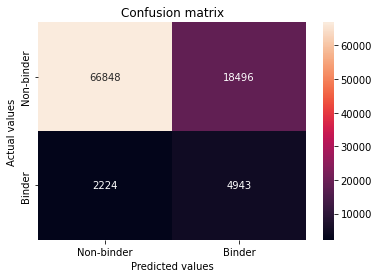

RandomForestClassifier(bootstrap=False, max_depth=60, n_estimators=400,
                       n_jobs=-1, random_state=42)
Accuracy score        :  [0.77602663]
F1 score              :  [0.32300856]
AUC                   :  0.7969388115479392
Sensitivity (TPR)     :  0.6896888516813171
Specificity (TNR)     :  0.7832770903637045
classification report :
               precision    recall  f1-score   support

           0       0.97      0.78      0.87     85344
           1       0.21      0.69      0.32      7167

    accuracy                           0.78     92511
   macro avg       0.59      0.74      0.59     92511
weighted avg       0.91      0.78      0.82     92511

              precision    recall  f1-score   support

  Non-binder       0.98      0.93      0.95     12657
      Binder       0.55      0.77      0.64      1309

    accuracy                           0.92     13966
   macro avg       0.76      0.85      0.80     13966
weighted avg       0.94      0.92      0.93  

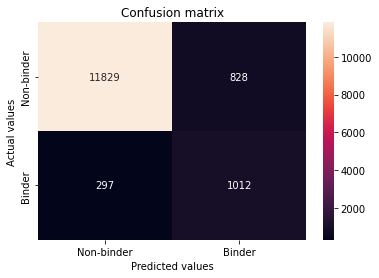

RandomForestClassifier(bootstrap=False, max_depth=70, max_features=5,
                       n_estimators=600, n_jobs=-1, random_state=42)
Accuracy score        :  [0.91944723]
F1 score              :  [0.64274373]
AUC                   :  0.899952034079162
Sensitivity (TPR)     :  0.773109243697479
Specificity (TNR)     :  0.9345816544204788
classification report :
               precision    recall  f1-score   support

           0       0.98      0.93      0.95     12657
           1       0.55      0.77      0.64      1309

    accuracy                           0.92     13966
   macro avg       0.76      0.85      0.80     13966
weighted avg       0.94      0.92      0.93     13966

              precision    recall  f1-score   support

  Non-binder       0.94      0.67      0.78     12651
      Binder       0.10      0.49      0.17       991

    accuracy                           0.66     13642
   macro avg       0.52      0.58      0.48     13642
weighted avg       0.88      0.

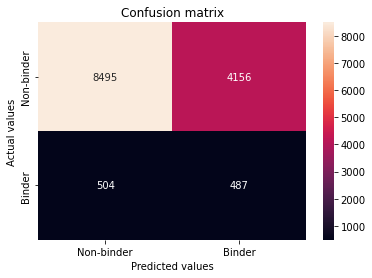

RandomForestClassifier(bootstrap=False, max_depth=60, max_features=10,
                       min_samples_leaf=2, n_estimators=200, n_jobs=-1,
                       random_state=42)
Accuracy score        :  [0.65840786]
F1 score              :  [0.17287895]
AUC                   :  0.5994732770413925
Sensitivity (TPR)     :  0.49142280524722504
Specificity (TNR)     :  0.6714884198877559
classification report :
               precision    recall  f1-score   support

           0       0.94      0.67      0.78     12651
           1       0.10      0.49      0.17       991

    accuracy                           0.66     13642
   macro avg       0.52      0.58      0.48     13642
weighted avg       0.88      0.66      0.74     13642

              precision    recall  f1-score   support

  Non-binder       0.96      0.83      0.89     12534
      Binder       0.19      0.53      0.28       967

    accuracy                           0.81     13501
   macro avg       0.57      0.68     

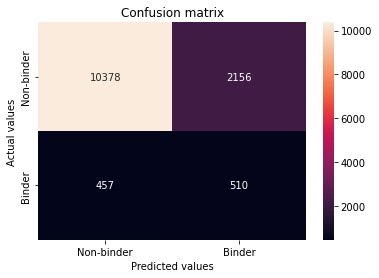

RandomForestClassifier(max_depth=60, max_features=10, n_estimators=600,
                       n_jobs=-1, random_state=42)
Accuracy score        :  [0.80645878]
F1 score              :  [0.2807597]
AUC                   :  0.7207808205321649
Sensitivity (TPR)     :  0.5274043433298863
Specificity (TNR)     :  0.8279878729854795
classification report :
               precision    recall  f1-score   support

           0       0.96      0.83      0.89     12534
           1       0.19      0.53      0.28       967

    accuracy                           0.81     13501
   macro avg       0.57      0.68      0.58     13501
weighted avg       0.90      0.81      0.84     13501

              precision    recall  f1-score   support

  Non-binder       0.98      0.65      0.78     12661
      Binder       0.06      0.60      0.11       484

    accuracy                           0.65     13145
   macro avg       0.52      0.62      0.44     13145
weighted avg       0.94      0.65      0.75   

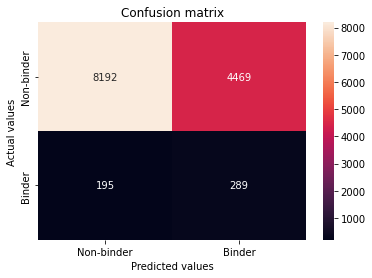

RandomForestClassifier(bootstrap=False, max_depth=80, min_samples_leaf=2,
                       n_estimators=200, n_jobs=-1, random_state=42)
Accuracy score        :  [0.64518828]
F1 score              :  [0.11026326]
AUC                   :  0.6780873914232618
Sensitivity (TPR)     :  0.5971074380165289
Specificity (TNR)     :  0.6470263012400285
classification report :
               precision    recall  f1-score   support

           0       0.98      0.65      0.78     12661
           1       0.06      0.60      0.11       484

    accuracy                           0.65     13145
   macro avg       0.52      0.62      0.44     13145
weighted avg       0.94      0.65      0.75     13145

              precision    recall  f1-score   support

  Non-binder       0.98      0.79      0.88     12581
      Binder       0.08      0.53      0.13       398

    accuracy                           0.79     12979
   macro avg       0.53      0.66      0.51     12979
weighted avg       0.95  

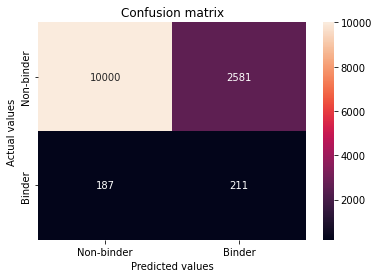

RandomForestClassifier(max_depth=80, max_features='log2', n_estimators=600,
                       n_jobs=-1, random_state=42)
Accuracy score        :  [0.78673241]
F1 score              :  [0.1322884]
AUC                   :  0.7041011431851252
Sensitivity (TPR)     :  0.5301507537688442
Specificity (TNR)     :  0.7948493760432398
classification report :
               precision    recall  f1-score   support

           0       0.98      0.79      0.88     12581
           1       0.08      0.53      0.13       398

    accuracy                           0.79     12979
   macro avg       0.53      0.66      0.51     12979
weighted avg       0.95      0.79      0.86     12979

              precision    recall  f1-score   support

  Non-binder       0.98      0.52      0.68     12304
      Binder       0.03      0.54      0.06       328

    accuracy                           0.52     12632
   macro avg       0.50      0.53      0.37     12632
weighted avg       0.95      0.52      0.6

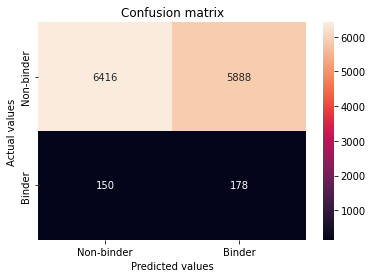

RandomForestClassifier(max_depth=70, max_features=5, min_samples_leaf=2,
                       n_estimators=600, n_jobs=-1, random_state=42)
Accuracy score        :  [0.5220076]
F1 score              :  [0.0556772]
AUC                   :  0.534017293602715
Sensitivity (TPR)     :  0.5426829268292683
Specificity (TNR)     :  0.5214564369310793
classification report :
               precision    recall  f1-score   support

           0       0.98      0.52      0.68     12304
           1       0.03      0.54      0.06       328

    accuracy                           0.52     12632
   macro avg       0.50      0.53      0.37     12632
weighted avg       0.95      0.52      0.66     12632

              precision    recall  f1-score   support

  Non-binder       0.81      0.55      0.65      9956
      Binder       0.24      0.52      0.33      2693

    accuracy                           0.54     12649
   macro avg       0.52      0.54      0.49     12649
weighted avg       0.69      

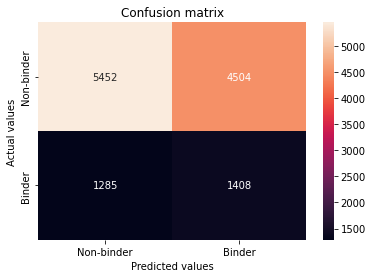

RandomForestClassifier(max_depth=60, min_samples_leaf=2, n_estimators=400,
                       n_jobs=-1, random_state=42)
Accuracy score        :  [0.54233536]
F1 score              :  [0.3272516]
AUC                   :  0.5510570311822819
Sensitivity (TPR)     :  0.5228369847753435
Specificity (TNR)     :  0.5476094817195661
classification report :
               precision    recall  f1-score   support

           0       0.81      0.55      0.65      9956
           1       0.24      0.52      0.33      2693

    accuracy                           0.54     12649
   macro avg       0.52      0.54      0.49     12649
weighted avg       0.69      0.54      0.58     12649



In [94]:
accuracy_rf_final, classify_metrics_rf_final, fpr_rf_final, tpr_rf_final, auc_score_rf_final, f1_rf_final  = Model.model_run(rf_tcr_final, pX_res_final, py_res_final, pX_test_final, py_test_final)
accuracy_rf_GLCTLVAML  , classify_metrics_rf_GLCTLVAML  , fpr_rf_GLCTLVAML  , tpr_rf_GLCTLVAML  , auc_score_rf_GLCTLVAML  , f1_rf_GLCTLVAML   = Model.model_run(rf_tcr_GLCTLVAML  , pX_res_GLCTLVAML  , py_res_GLCTLVAML  , pX_test_GLCTLVAML  , py_test_GLCTLVAML  )
accuracy_rf_NLVPMVATV  , classify_metrics_rf_NLVPMVATV  , fpr_rf_NLVPMVATV  , tpr_rf_NLVPMVATV  , auc_score_rf_NLVPMVATV  , f1_rf_NLVPMVATV   = Model.model_run(rf_tcr_NLVPMVATV  , pX_res_NLVPMVATV  , py_res_NLVPMVATV  , pX_test_NLVPMVATV  , py_test_NLVPMVATV  )
accuracy_rf_GILGFVFTL  , classify_metrics_rf_GILGFVFTL  , fpr_rf_GILGFVFTL  , tpr_rf_GILGFVFTL  , auc_score_rf_GILGFVFTL  , f1_rf_GILGFVFTL   = Model.model_run(rf_tcr_GILGFVFTL  , pX_res_GILGFVFTL  , py_res_GILGFVFTL  , pX_test_GILGFVFTL  , py_test_GILGFVFTL  )
accuracy_rf_TPRVTGGGAM , classify_metrics_rf_TPRVTGGGAM , fpr_rf_TPRVTGGGAM , tpr_rf_TPRVTGGGAM , auc_score_rf_TPRVTGGGAM , f1_rf_TPRVTGGGAM  = Model.model_run(rf_tcr_TPRVTGGGAM , pX_res_TPRVTGGGAM , py_res_TPRVTGGGAM , pX_test_TPRVTGGGAM , py_test_TPRVTGGGAM )
accuracy_rf_ELAGIGILTV , classify_metrics_rf_ELAGIGILTV , fpr_rf_ELAGIGILTV , tpr_rf_ELAGIGILTV , auc_score_rf_ELAGIGILTV , f1_rf_ELAGIGILTV  = Model.model_run(rf_tcr_ELAGIGILTV , pX_res_ELAGIGILTV , py_res_ELAGIGILTV , pX_test_ELAGIGILTV , py_test_ELAGIGILTV )
accuracy_rf_AVFDRKSDAK, classify_metrics_rf_AVFDRKSDAK, fpr_rf_AVFDRKSDAK, tpr_rf_AVFDRKSDAK, auc_score_rf_AVFDRKSDAK, f1_rf_AVFDRKSDAK = Model.model_run(rf_tcr_AVFDRKSDAK , pX_res_AVFDRKSDAK, py_res_AVFDRKSDAK, pX_test_AVFDRKSDAK, py_test_AVFDRKSDAK)
accuracy_rf_KLGGALQAK , classify_metrics_rf_KLGGALQAK , fpr_rf_KLGGALQAK , tpr_rf_KLGGALQAK , auc_score_rf_KLGGALQAK , f1_rf_KLGGALQAK  = Model.model_run(rf_tcr_KLGGALQAK ,  pX_res_KLGGALQAK , py_res_KLGGALQAK , pX_test_KLGGALQAK , py_test_KLGGALQAK )

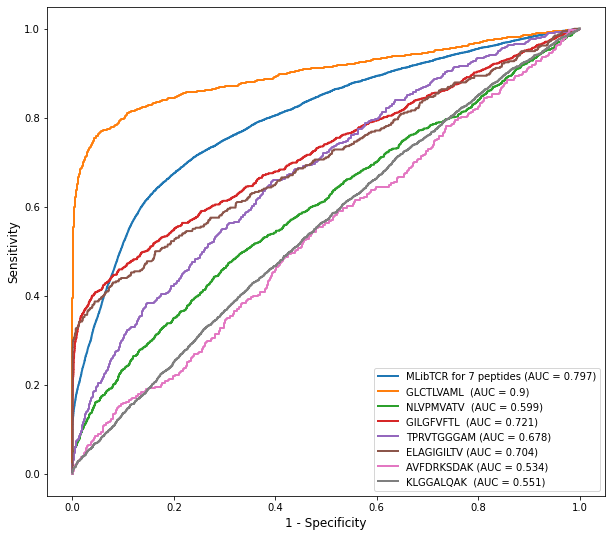

In [95]:
#linestyle="dotted"
fig = plt.figure(figsize=(10,9))
ax  = fig.add_subplot(111)

ax.plot(fpr_rf_final, tpr_rf_final, label = 'MLibTCR for 7 peptides (AUC = {0})'.format(round(auc_score_rf_final,3)),linewidth=2)
ax.plot(fpr_rf_GLCTLVAML  , tpr_rf_GLCTLVAML  , label = 'GLCTLVAML  (AUC = {0})'.format(round(auc_score_rf_GLCTLVAML  ,3)),linewidth=2,)
ax.plot(fpr_rf_NLVPMVATV  , tpr_rf_NLVPMVATV  , label = 'NLVPMVATV  (AUC = {0})'.format(round(auc_score_rf_NLVPMVATV  ,3)),linewidth=2,)
ax.plot(fpr_rf_GILGFVFTL  , tpr_rf_GILGFVFTL  , label = 'GILGFVFTL  (AUC = {0})'.format(round(auc_score_rf_GILGFVFTL  ,3)),linewidth=2)
ax.plot(fpr_rf_TPRVTGGGAM , tpr_rf_TPRVTGGGAM , label = 'TPRVTGGGAM (AUC = {0})'.format(round(auc_score_rf_TPRVTGGGAM ,3)),linewidth=2)
ax.plot(fpr_rf_ELAGIGILTV , tpr_rf_ELAGIGILTV , label = 'ELAGIGILTV (AUC = {0})'.format(round(auc_score_rf_ELAGIGILTV ,3)),linewidth=2)
ax.plot(fpr_rf_AVFDRKSDAK, tpr_rf_AVFDRKSDAK , label =  'AVFDRKSDAK (AUC = {0})'.format(round(auc_score_rf_AVFDRKSDAK,3) ),linewidth=2)
ax.plot(fpr_rf_KLGGALQAK , tpr_rf_KLGGALQAK ,  label =  'KLGGALQAK  (AUC = {0})'.format(round(auc_score_rf_KLGGALQAK ,3) ),linewidth=2)

# ax.plot([0, 1], [0, 1], linestyle="dashed", lw=1, color="k", label="Random guess", alpha=0.8)

plt.legend(loc="best")
# plt.title("ROC-AUC for 7 highly false positive peptides", fontsize=11)
plt.xlabel("1 - Specificity", fontsize=12)
plt.ylabel("Sensitivity", fontsize=12)

plt.savefig("../../analysis/figures/ROC_AUC_for_7_highly_false_positive_peptides.png")
plt.savefig("../../analysis/figures/ROC_AUC_for_7_highly_false_positive_peptides.pdf")

plt.rcParams.update({'font.size': 12})

plt.show()